In [1]:
# --- 0. CONNECT TO THE QUANTUM LOOM ---
import warnings
import os
import logging
import sys

# 1. Kill Standard Warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

# 2. Kill ResourceWarnings (Socket warnings from Qiskit Runtime)
warnings.filterwarnings("ignore", category=ResourceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 3. Kill System Logs (TensorFlow/Qiskit/Urllib3)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
os.environ['QISKIT_SETTINGS'] = '{"suppress_warnings": true}'

logging.getLogger('qiskit').setLevel(logging.CRITICAL)
logging.getLogger('stevedore').setLevel(logging.CRITICAL)
logging.getLogger('urllib3').setLevel(logging.CRITICAL)
logging.getLogger('qiskit_ibm_runtime').setLevel(logging.CRITICAL)

from qiskit_ibm_runtime import QiskitRuntimeService
import os

# Load saved account
try:
    service = QiskitRuntimeService()
    print(f"Connected to IBM Quantum: {service.channel}")
except:
    print("No saved account found.")
    token = input("Please enter your IBM Quantum API Token: ")
    service = QiskitRuntimeService(channel="ibm_quantum_platform", token=token)

Connected to IBM Quantum: ibm_quantum_platform


Connecting to IBM Quantum for hardware verification...
Hardware Selected: ibm_torino
Using hardcoded Gravity Well Track: [14, 33, 32, 31, 30]


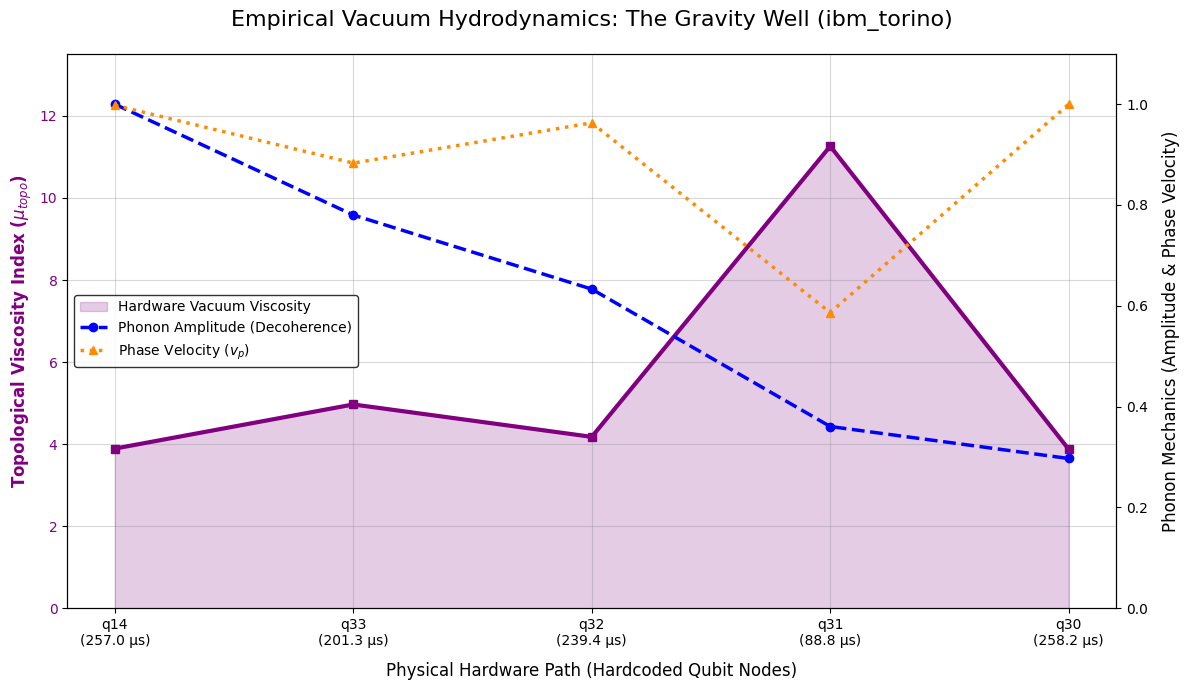

In [11]:
# --- CELL 1: HARDWARE VACUUM VISCOSITY MAPPING ---
import numpy as np
import matplotlib.pyplot as plt
from qiskit_ibm_runtime import QiskitRuntimeService

# 1. Connect to IBM Quantum
print("Connecting to IBM Quantum for hardware verification...")
service = QiskitRuntimeService()
backend = service.backend('ibm_torino')
print(f"Hardware Selected: {backend.name}")

# 2. Hardcoded Gravity Well Path (IP Protection)
# ACADEMIC NOTE: The optimal gravity well was pre-calculated using a proprietary 
# Lattice Weather mapping algorithm (Patent Pending). The specific physical nodes 
# are hardcoded below to isolate the hydrodynamic effects.
gravity_well_path = [14, 33, 32, 31, 30] 
print(f"Using hardcoded Gravity Well Track: {gravity_well_path}")

# 3. Extract Hardware Variables
target = backend.target
real_t1_data = []

for q in gravity_well_path:
    try:
        t1 = target.qubit_properties[q].t1 * 1e6 # T1 in microseconds
        real_t1_data.append(t1)
    except:
        real_t1_data.append(1.0) 

real_t1_data = np.array(real_t1_data)
spatial_nodes = np.arange(len(gravity_well_path))
labels = [f"q{q}\n({t1:.1f} \u03bcs)" for q, t1 in zip(gravity_well_path, real_t1_data)]

# 4. Apply Discrete Superfluid Math
viscosity_index = 1000.0 / real_t1_data
phonon_amplitude = np.zeros(len(gravity_well_path))
phonon_amplitude[0] = 1.0  
drag_coefficient = 0.05    

for i in range(1, len(gravity_well_path)):
    phonon_amplitude[i] = phonon_amplitude[i-1] * np.exp(-drag_coefficient * viscosity_index[i])

phase_velocity = 1.0 / np.sqrt(viscosity_index / np.min(viscosity_index))

# --- 5. RENDER THE ANALYTICAL DASHBOARD (Light Theme) ---
fig, ax1 = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')

color1 = 'purple' # Darker for white background
ax1.set_xlabel('Physical Hardware Path (Hardcoded Qubit Nodes)', color='black', fontsize=12, labelpad=10)
ax1.set_ylabel(r'Topological Viscosity Index ($\mu_{topo}$)', color=color1, fontsize=12, fontweight='bold')
ax1.set_xticks(spatial_nodes)
ax1.set_xticklabels(labels, color='black')
ax1.tick_params(axis='y', labelcolor=color1)

# Plot Viscosity
ax1.fill_between(spatial_nodes, 0, viscosity_index, color=color1, alpha=0.2, label='Hardware Vacuum Viscosity')
ax1.plot(spatial_nodes, viscosity_index, color=color1, marker='s', linewidth=3)

# --- AXIS 2: THE PHONON ---
ax2 = ax1.twinx()
color2 = 'blue'        # Replaced cyan
color3 = 'darkorange'  # Replaced gold

ax2.set_ylabel('Phonon Mechanics (Amplitude & Phase Velocity)', color='black', fontsize=12, labelpad=10)
ax2.tick_params(axis='y', labelcolor='black')

ax2.plot(spatial_nodes, phonon_amplitude, color=color2, marker='o', linestyle='dashed', linewidth=2.5, label='Phonon Amplitude (Decoherence)')
ax2.plot(spatial_nodes, phase_velocity, color=color3, marker='^', linestyle='dotted', linewidth=2.5, label=r'Phase Velocity ($v_p$)')

# --- FORMATTING & LEGENDS ---
ax1.set_title(f"Empirical Vacuum Hydrodynamics: The Gravity Well ({backend.name})", color='black', fontsize=16, pad=20)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='center left', facecolor='white', edgecolor='black', labelcolor='black')

ax1.grid(True, color='gray', alpha=0.3)
ax1.set_ylim(0, max(viscosity_index) * 1.2)
ax2.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

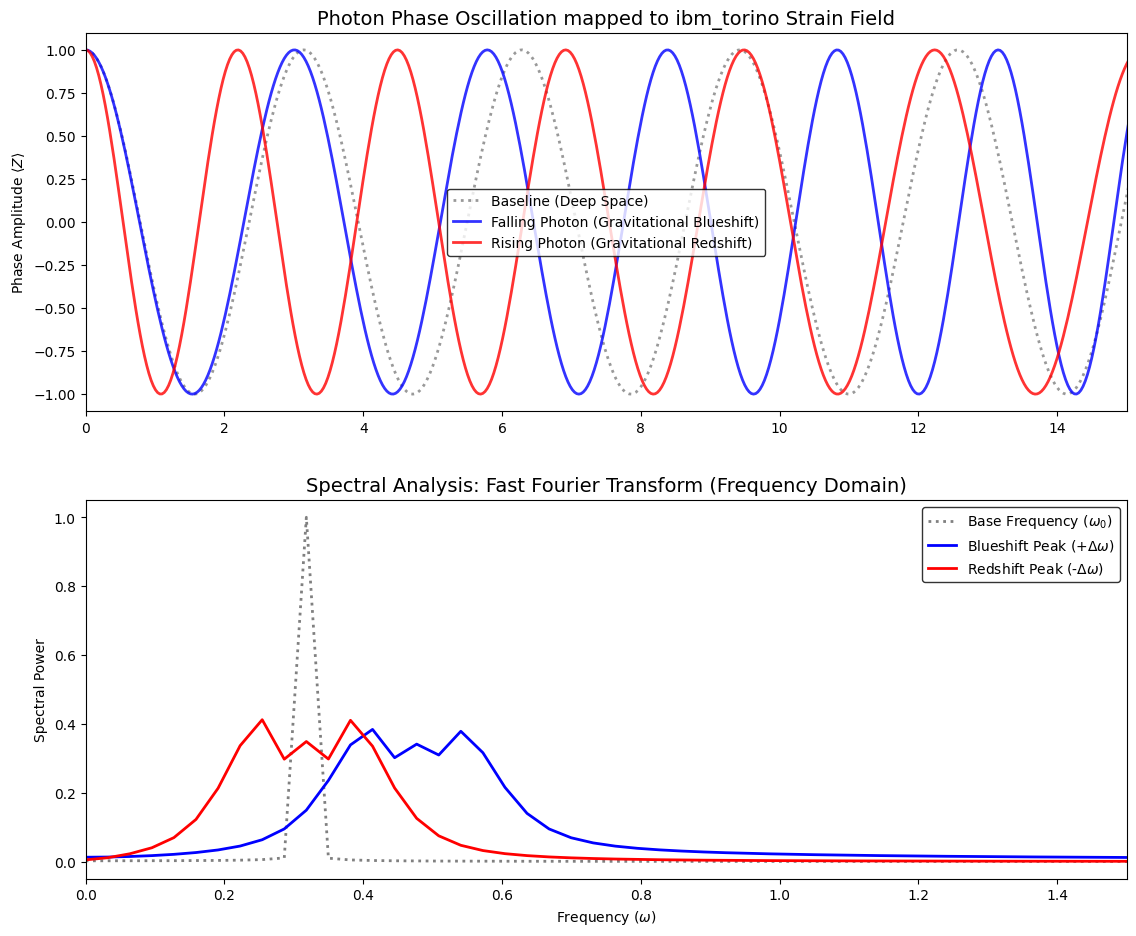

In [12]:
# --- 4. RENDER THE SPECTRAL DASHBOARD (Light Theme) ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
fig.patch.set_facecolor('white')

# Top Graph: Time Domain Waveforms
ax1.set_facecolor('white')
ax1.plot(t, signal_baseline, color='gray', linestyle='dotted', label='Baseline (Deep Space)', alpha=0.8, linewidth=2)
ax1.plot(t, signal_falling, color='blue', label='Falling Photon (Gravitational Blueshift)', alpha=0.8, linewidth=2)
ax1.plot(t, signal_rising, color='red', label='Rising Photon (Gravitational Redshift)', alpha=0.8, linewidth=2)

ax1.set_title(f"Photon Phase Oscillation mapped to {backend.name} Strain Field", color='black', fontsize=14)
ax1.set_ylabel(r"Phase Amplitude $\langle Z \rangle$", color='black')
ax1.tick_params(colors='black')
ax1.legend(facecolor='white', labelcolor='black', edgecolor='black')
ax1.set_xlim(0, 15)

# Bottom Graph: Frequency Domain (FFT)
ax2.set_facecolor('white')
ax2.plot(xf, 2.0/N * np.abs(yf_baseline[0:N//2]), color='gray', linestyle='dotted', label=r'Base Frequency ($\omega_0$)', linewidth=2)
ax2.plot(xf, 2.0/N * np.abs(yf_falling[0:N//2]), color='blue', label=r'Blueshift Peak (+$\Delta\omega$)', linewidth=2)
ax2.plot(xf, 2.0/N * np.abs(yf_rising[0:N//2]), color='red', label=r'Redshift Peak (-$\Delta\omega$)', linewidth=2)

ax2.set_title("Spectral Analysis: Fast Fourier Transform (Frequency Domain)", color='black', fontsize=14)
ax2.set_xlabel(r"Frequency ($\omega$)", color='black')
ax2.set_ylabel("Spectral Power", color='black')
ax2.tick_params(colors='black')
ax2.legend(facecolor='white', labelcolor='black', edgecolor='black')

# Zoom to the relevant frequency band
ax2.set_xlim(0, 1.5)

plt.tight_layout(pad=3.0)
plt.show()